Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
37/37 - 1s - loss: 0.0385 - val_loss: 0.0187
Epoch 2/40
37/37 - 0s - loss: 0.0211 - val_loss: 0.0137
Epoch 3/40
37/37 - 0s - loss: 0.0179 - val_loss: 0.0120
Epoch 4/40
37/37 - 0s - loss: 0.0155 - val_loss: 0.0107
Epoch 5/40
37/37 - 0s - loss: 0.0143 - val_loss: 0.0096
Epoch 6/40
37/37 - 0s - loss: 0.0133 - val_loss: 0.0094
Epoch 7/40
37/37 - 0s - loss: 0.0125 - val_loss: 0.0084
Epoch 8/40
37/37 - 0s - loss: 0.0117 - val_loss: 0.0081
Epoch 9/40
37/37 - 0s - loss: 0.0109 - val_loss: 0.0078
Epoch 10

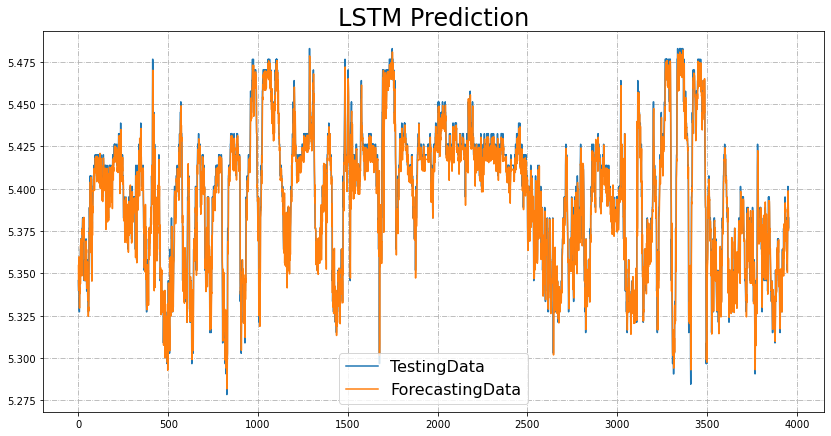

In [7]:
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import read_excel, read_csv 
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time
from tensorflow.keras.models import load_model

plt.figure(figsize=(14,7))

#loading data
df = read_excel('.../channel_100.xlsx',usecols = [1],header = 0)
dataset = df.values
dataset = dataset.astype('float')
scaler = MinMaxScaler(feature_range = (-1,1))
dataset = scaler.fit_transform(dataset)

#create input
timestep = 10

X= []
Y=[]

raw_data=dataset

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)

train_size = int(len(dataset) * 0.7)
Xtrain = X[:train_size,:,:]  
Ytrain = Y[:train_size] 
Xtest = X[train_size:,:,:]  
Ytest= Y[train_size:]  

#create and fit the LSTM network 
model = Sequential()
model.add(LSTM(50,input_shape = (10,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
start = time.time()
hist = model.fit(Xtrain,Ytrain, validation_data = (Xtest, Ytest), epochs = 40,batch_size = 256,verbose = 2)
end = time.time()
print("Train time: %.4f" % (end-start))

trainPredict = model.predict(Xtrain)
trainPredict = scaler.inverse_transform(trainPredict)

testPredict = model.predict(Xtest)
testPredict = scaler.inverse_transform(testPredict)

Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

MSE = mean_squared_error(Ytest,testPredict)
print('Test MSE: %.4f MSE' % (MSE))
MAE = mean_absolute_error(Ytest,testPredict)
print('Test MAE: %.4f MAE' % (MAE))
R2 = r2_score(Ytest,testPredict)
print('Test R2: %.4f R2' % (R2))

plt.title('LSTM Prediction',fontsize = 24)
plt.plot(Ytest,label='TestingData')
plt.plot(testPredict,label='ForecastingData')
plt.legend(fontsize = 16)
plt.grid(linestyle='-.')
plt.show()

#model.save('.../LSTMmodel.h5')